# **Import Library**


In [ ]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#standard Libraries
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,8)

from collections import Counter

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import metrics


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cse498r/human activities/train.csv')  #zara's path
# test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cse498r/human activities/test.csv')    #zara's path

#train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSE498R/train.csv')   #Baker's Path
#test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSE498R/test.csv')     #Baker's Path

train = pd.read_csv('/content/drive/MyDrive/final dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/final dataset/test.csv')

**Understanding the data**


In [ ]:
#see what is present in the data
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [ ]:
#see what is present in the data
train.tail()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS
7351,0.351503,-0.012423,-0.203867,-0.269270,-0.087212,0.177404,-0.377404,-0.038678,0.229430,0.269013,...,-0.740738,-0.280088,-0.007739,-0.056088,-0.616956,-0.783267,0.246809,0.036695,30,WALKING_UPSTAIRS


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [ ]:
train.shape

(7352, 563)

In [ ]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [ ]:
train.dtypes

tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object

In [ ]:
# how many records are available for each subjects
train.subject.value_counts()

25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: subject, dtype: int64

In [ ]:
#count how many unique value every feature have
train.nunique()

tBodyAcc-mean()-X       7347
tBodyAcc-mean()-Y       7352
tBodyAcc-mean()-Z       7349
tBodyAcc-std()-X        7349
tBodyAcc-std()-Y        7351
                        ... 
angle(X,gravityMean)    7352
angle(Y,gravityMean)    7352
angle(Z,gravityMean)    7352
subject                   21
Activity                   6
Length: 563, dtype: int64

In [ ]:
train['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

# **Data Preprocessing**

##Checking for Duplicates

In [ ]:
print('Number of duplicates in train : ',sum(train.duplicated()))
print('Number of duplicates in test  : ',sum(test.duplicated()))

Number of duplicates in train :  0
Number of duplicates in test  :  0


##Checking for Missing Values

In [ ]:
print('Number of Missing values in train : ',train.isna().values.sum())
print('Number of Missing values in test  : ',test.isna().values.sum())

Number of Missing values in train :  0
Number of Missing values in test  :  0


In [ ]:
train.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

##Checking for class imbalance¶

In [ ]:
train['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

here we can see our dataset is balanced

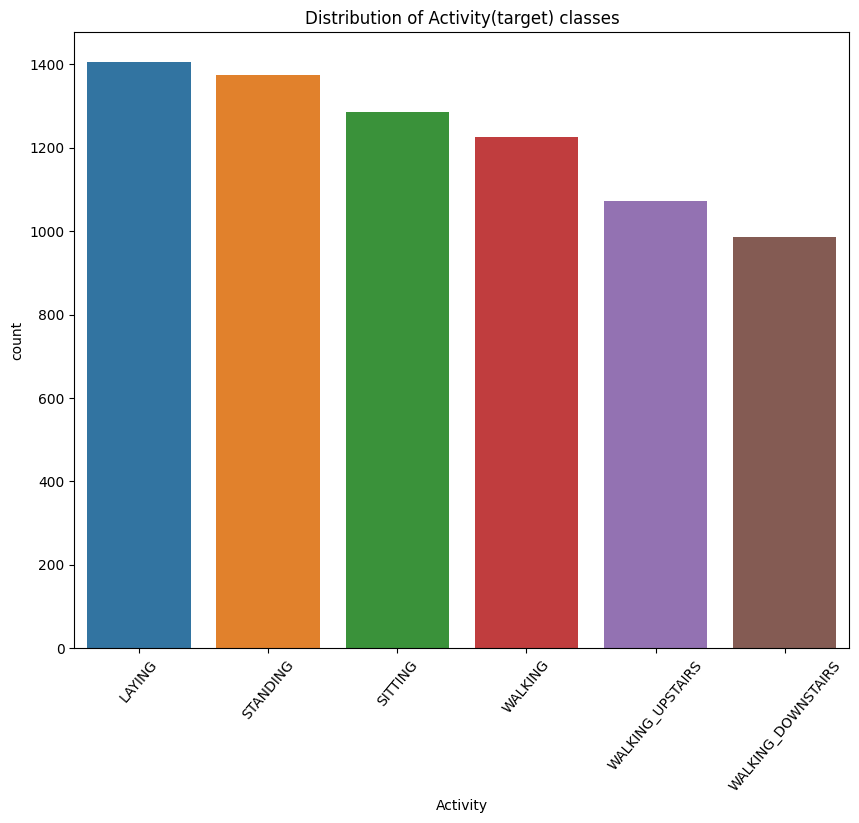

In [ ]:
sns.countplot(x=train['Activity'],data=train,order =train['Activity'].value_counts().index)
plt.title('Distribution of Activity(target) classes')
plt.xticks(rotation=50)
plt.show()

# Label Encoding

In [ ]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [ ]:
#assigning label encoder
le = LabelEncoder()
#label encoding target class "Activity"
train[['Activity']]= train[['Activity']].apply(le.fit_transform)

In [ ]:
print(train.shape)
train.head(10)

(7352, 563)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,2
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,2
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,2
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,2
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,2
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,2
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,1,2
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,1,2
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,1,2
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,1,2


In [ ]:
train.tail(20)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
7332,0.188898,-0.094342,-0.062392,-0.346270,-0.235424,0.197720,-0.407151,-0.247231,0.271268,-0.104526,...,-0.472851,0.189291,-0.417935,0.833435,-0.884542,-0.876955,0.183176,0.021774,30,5
7333,0.215789,-0.022920,-0.236713,-0.385755,-0.189566,0.017584,-0.454614,-0.232688,-0.001215,0.013823,...,-0.782173,0.188078,0.347573,0.798495,-0.041102,-0.827843,0.216989,0.011177,30,5
7334,0.407780,-0.053721,-0.160671,-0.321271,-0.089818,0.173128,-0.394279,-0.095346,0.205751,0.013823,...,-0.644600,-0.593603,0.547782,0.535282,-0.081472,-0.802731,0.234439,0.013737,30,5
7335,0.260279,0.000813,-0.103406,-0.330964,0.018713,0.208689,-0.445056,0.002973,0.333803,0.185029,...,-0.886630,0.370358,-0.302914,-0.773404,-0.578706,-0.782357,0.248205,0.007170,30,5
7336,0.128064,-0.027657,-0.088319,-0.280320,-0.009818,0.118190,-0.419705,-0.059985,0.214129,0.185029,...,-0.808755,0.730165,-0.013649,-0.881019,-0.059017,-0.779754,0.250290,0.022490,30,5
7337,0.278414,-0.070497,-0.050016,-0.228968,-0.151583,0.225156,-0.306094,-0.142802,0.288118,0.021923,...,-0.701651,-0.097635,0.721639,0.780377,-0.082877,-0.780967,0.247460,0.043458,30,5
7338,0.344757,-0.045966,-0.011919,-0.272351,-0.032724,0.221100,-0.357972,-0.040113,0.290947,-0.031458,...,-0.858891,-0.270300,-0.108579,-0.301490,-0.514063,-0.777428,0.250425,0.040161,30,5
7339,0.326647,0.012036,-0.091359,-0.284641,-0.141369,0.175757,-0.367565,-0.197203,0.248114,-0.013741,...,-0.848006,-0.211652,-0.421976,-0.063065,0.424398,-0.773576,0.254537,0.023146,30,5
7340,0.223283,0.013911,-0.214152,-0.314130,-0.287192,0.079174,-0.392787,-0.307278,0.127536,-0.013741,...,-0.804343,0.246446,0.239618,0.853643,0.610375,-0.775554,0.253222,0.014452,30,5
7341,0.363768,-0.011264,-0.275724,-0.352297,-0.235648,0.068057,-0.418548,-0.234833,0.107217,-0.122244,...,-0.551732,-0.178334,0.412831,0.822206,-0.002927,-0.774366,0.254070,0.016289,30,5


# **Exploratory Data Analysis (EDA)**


In [ ]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,2
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,2
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,2
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,2
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,2


In [ ]:
#Counting how much parameter does each feature has
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0]
                                for col in train.columns]),orient = 'index').rename(columns={0:'count'}).sort_values('count',ascending = False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


##**Relation of variables**

tBodyAccMag-mean feature analysis

Text(0.1, 9, 'Dynamic Activities')

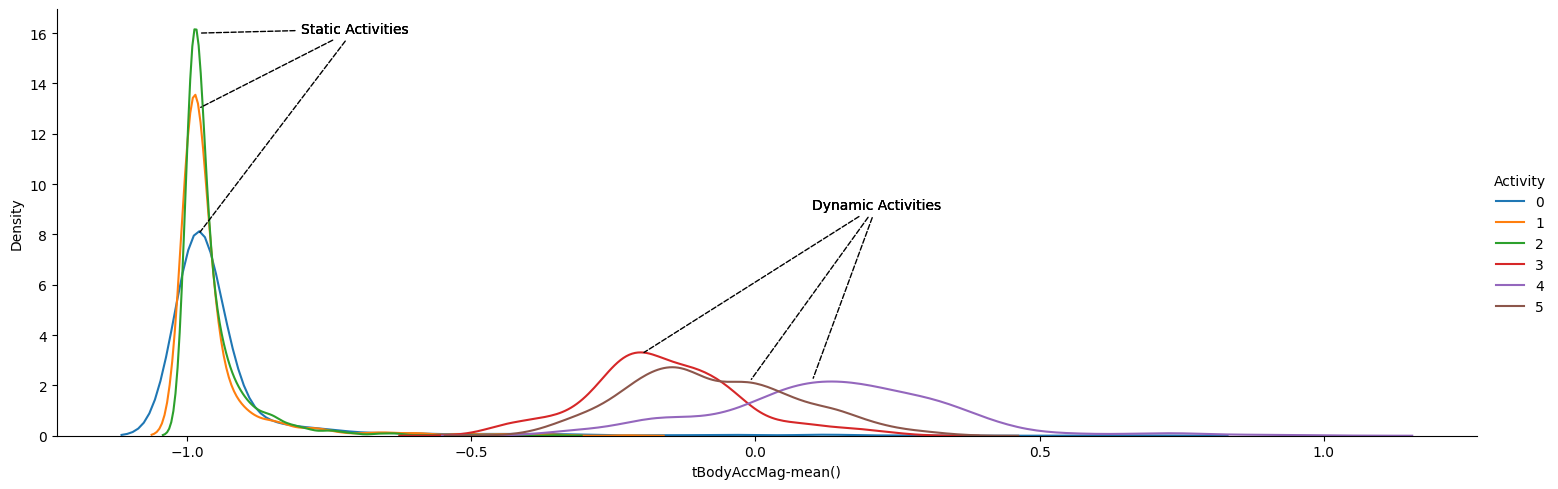

In [ ]:
facetGrid = sns.FacetGrid(train,hue='Activity',height=5,aspect=3)
facetGrid.map(sns.distplot,'tBodyAccMag-mean()',hist = False).add_legend()

plt.annotate("Static Activities", xy = (-.98, 8), xytext = (-.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy = (-.98, 13), xytext = (-.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy = (-.98, 16), xytext = (-.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

plt.annotate("Dynamic Activities", xy=(-0.2,3.25), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(0.1,2.18), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(-0.01,2.15), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

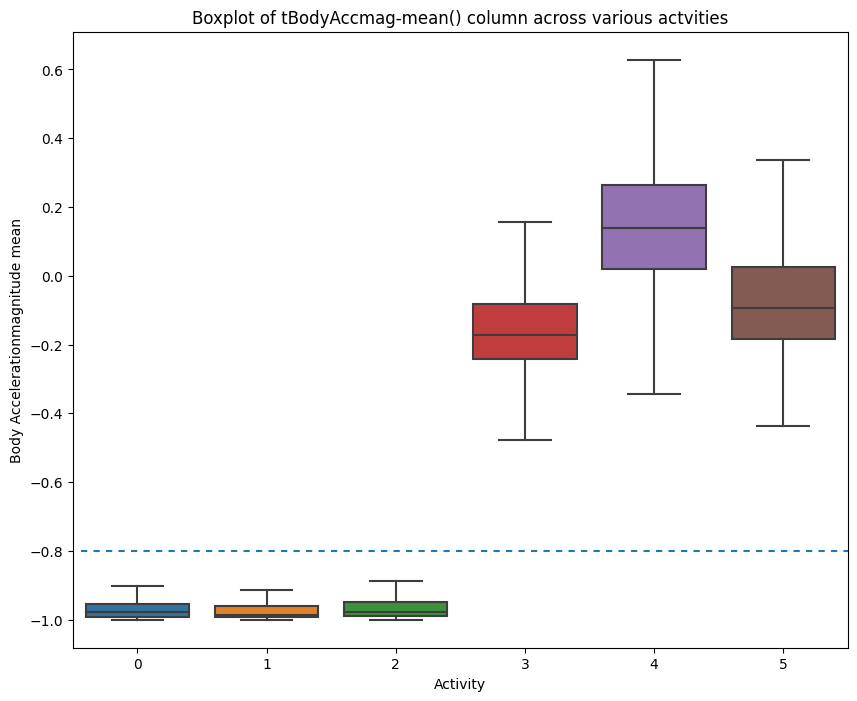

In [ ]:
sns.boxplot(x='Activity',y='tBodyAccMag-mean()',data=train, showfliers=False)
plt.ylabel("Body Accelerationmagnitude mean")
plt.title('Boxplot of tBodyAccmag-mean() column across various actvities')
plt.axhline(y=-0.8,xmin=0.01,dashes=(3,3))
plt.show()

# Data splitting and Feature scealing

In [ ]:
#Splitting the dataset
y = train['Activity']
X = train.drop(['Activity'], axis = 'columns')         #test data (removing target column)

In [ ]:
y.head(10)

0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    2
8    2
9    2
Name: Activity, dtype: int64

In [ ]:
X.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,-0.545410,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.217198,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,1
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,-0.082307,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,1
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,-0.269401,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,1
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.339526,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20, stratify = y)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(5881, 562)
(1471, 562)


In [ ]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [ ]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
6548,0.280043,-0.017164,-0.111414,-0.960279,-0.966716,-0.976654,-0.960265,-0.963947,-0.974170,-0.907015,...,-0.523554,-0.856629,0.560249,-0.036881,-0.670754,0.359862,0.563074,-0.284198,-0.730793,28
5020,0.310097,-0.038838,-0.155229,0.187699,0.131858,0.308571,0.059090,0.167590,0.164343,0.517677,...,-0.151799,-0.433796,-0.288871,0.519201,-0.931109,-0.331517,-0.873524,0.162332,0.080182,23
2898,0.274159,-0.015415,-0.111336,-0.997255,-0.987430,-0.993670,-0.997596,-0.986407,-0.993484,-0.942641,...,-0.334995,-0.696348,0.257030,0.491420,0.877516,-0.428658,-0.669821,0.230940,0.209141,16
7105,0.235632,-0.014193,-0.168406,-0.207576,0.005364,-0.264342,-0.278321,0.018148,-0.253972,0.074953,...,-0.174839,-0.592038,0.272976,0.113981,0.807823,-0.069272,-0.873640,0.185547,0.017942,30
1148,0.274980,-0.004853,-0.108091,0.004931,0.120694,-0.478809,-0.047748,0.042928,-0.479689,0.268734,...,-0.292276,-0.669009,0.257739,-0.984429,0.966169,-0.527964,-0.688197,0.312867,0.035283,6


In [ ]:
scaler = MinMaxScaler().fit(X_train)

In [ ]:
print(scaler)

MinMaxScaler()


In [ ]:
scaler.data_min_

array([-1.        , -0.68409659, -0.92598834, -1.        , -0.99987292,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -0.8290431 , -1.        , -1.        , -1.        , -1.        ,
       -0.9991085 , -1.        , -0.99999671, -1.        , -0.99967518,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -0.92589735, -0.92574827, -0.98057777, -0.82205333, -1.        ,
       -1.        , -1.        , -1.        , -0.80950184, -0.75375375,
       -1.        , -0.93620242, -1.        , -1.        , -0.97221933,
       -0.94656635, -0.53522237, -1.        , -1.        , -0.99982977,
       -1.        , -1.        , -0.99984878, -1.        , -0.99295876,
       -0.49387412, -1.        , -0.98614862, -0.56815651, -1.        ,
       -1.        , -1.        , -0.99999904, -0.99999923, -1.        ,
       -0.99994572, -0.99996947, -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.  

In [ ]:
scaler.data_max_

array([ 1.        ,  1.        ,  0.94879499,  1.        ,  0.91623796,
        1.        ,  1.        ,  0.96766404,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  0.97235932,
        1.        ,  1.        ,  1.        ,  0.84170823,  1.        ,
        1.        ,  1.        ,  0.91966171,  1.        ,  0.95365751,
        1.        ,  0.97844881,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  0.81462304,  0.86602457,
        0.94640524,  1.        ,  1.        ,  1.        ,  0.99951266,
        0.99154906,  1.        ,  0.9993499 ,  0.78302801,  1.        ,
        1.        ,  0.8356586 ,  1.        ,  1.        ,  0.97103074,
        0.96830748,  0.99658549,  1.        ,  1.        ,  0.99943868,
        1.        ,  0.975855  ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  0.81

In [ ]:
X_train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,...,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000
mean,0.273743,-0.017602,-0.108739,-0.605854,-0.510084,-0.602512,-0.631041,-0.526169,-0.604196,-0.469152,...,-0.304178,-0.622292,0.012546,0.003967,0.005294,-0.004683,-0.489321,0.058673,-0.054779,17.474069
std,0.070175,0.037359,0.055456,0.448264,0.503975,0.422479,0.423509,0.487368,0.417494,0.544196,...,0.322585,0.309628,0.337574,0.446007,0.610573,0.477956,0.510645,0.296744,0.280210,8.946138
min,-1.000000,-0.684097,-0.925988,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.980143,1.000000
25%,0.262535,-0.024828,-0.120817,-0.992662,-0.977937,-0.980020,-0.993485,-0.978087,-0.979966,-0.936067,...,-0.541384,-0.844611,-0.119541,-0.285727,-0.494378,-0.376301,-0.811199,-0.017732,-0.143184,8.000000
50%,0.277121,-0.017260,-0.108601,-0.945921,-0.850084,-0.860850,-0.950616,-0.857741,-0.857962,-0.881365,...,-0.342058,-0.709336,0.010413,0.011103,0.004526,0.000895,-0.709439,0.181557,0.004291,19.000000
75%,0.288089,-0.010813,-0.097386,-0.245491,-0.034196,-0.258924,-0.296609,-0.065896,-0.262763,-0.019153,...,-0.120915,-0.497182,0.154557,0.294089,0.501933,0.362738,-0.504746,0.248675,0.111926,26.000000
max,1.000000,1.000000,0.948795,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.941113,0.894210,1.000000,1.000000,0.998702,0.996078,0.977344,0.478157,1.000000,30.000000


In [ ]:
scaler.feature_range

(0, 1)

In [ ]:
scaler.transform(X_train)

array([[0.64002132, 0.3960179 , 0.43448987, ..., 0.48425265, 0.12592529,
        0.93103448],
       [0.65504836, 0.38314841, 0.41111902, ..., 0.78633883, 0.5354788 ,
        0.75862069],
       [0.63707968, 0.39705655, 0.43453155, ..., 0.83275288, 0.60060525,
        0.51724138],
       ...,
       [0.63862897, 0.39602902, 0.43590364, ..., 0.64994603, 0.40394266,
        0.96551724],
       [0.67679977, 0.35615592, 0.45271228, ..., 0.88172913, 0.50909583,
        0.24137931],
       [0.62814938, 0.39383652, 0.44114587, ..., 0.41491668, 0.20287178,
        0.68965517]])

In [ ]:
scaler = MinMaxScaler().fit(X_test)

In [ ]:
print(scaler)

MinMaxScaler()


In [ ]:
scaler.data_min_

array([-0.85384825, -1.        , -1.        , -0.99969892, -0.99984424,
       -0.99714577, -0.99986742, -0.99941912, -0.99729517, -0.9550692 ,
       -1.        , -0.90399302, -0.62592807, -0.76084963, -0.50090876,
       -1.        , -0.99999919, -0.9999986 , -0.99996282, -1.        ,
       -0.99972135, -0.99879271, -1.        , -1.        , -1.        ,
       -0.89810192, -0.9630993 , -1.        , -0.706457  , -0.62697813,
       -0.73178097, -0.6049626 , -0.88588163, -1.        , -0.51848173,
       -0.96188168, -1.        , -0.9976812 , -0.99789968, -0.96046873,
       -1.        , -0.48370186, -0.99945181, -0.99988679, -0.99979107,
       -0.99954559, -0.99992796, -0.99980552, -0.99962284, -1.        ,
       -0.48074233, -0.99958809, -1.        , -0.56815651, -0.99717818,
       -0.9527667 , -0.99999983, -1.        , -0.99999759, -0.99997435,
       -0.99988562, -0.99981267, -1.        , -1.        , -1.        ,
       -0.99300199, -0.28584187, -0.99558148, -0.1116468 , -0.99

In [ ]:
scaler.data_max_

array([ 6.8026620e-01,  6.4674689e-01,  1.0000000e+00,  8.1710448e-01,
        8.7303705e-01,  8.3366631e-01,  7.3456595e-01,  8.4569547e-01,
        9.0630302e-01,  8.2121803e-01,  8.0153114e-01,  5.3208934e-01,
        8.8719695e-01,  8.7564986e-01,  1.0000000e+00,  8.5267656e-01,
        6.8595676e-01,  8.1985503e-01,  1.0000000e+00,  7.4269377e-01,
        4.4978080e-01,  8.9890012e-01,  9.1239703e-01,  9.8729545e-01,
        1.0000000e+00,  9.2929351e-01,  9.1406221e-01,  9.7687005e-01,
        9.0851749e-01,  7.8486120e-01,  7.4241653e-01,  9.8063436e-01,
        5.7583178e-01,  7.4552642e-01,  1.0000000e+00,  9.9720675e-01,
        6.7230598e-01,  9.5409384e-01,  8.8316477e-01,  1.0000000e+00,
        9.8889544e-01,  9.8772665e-01,  1.0000000e+00,  1.0000000e+00,
        8.9313501e-01,  5.2405426e-01,  1.0000000e+00,  9.1420574e-01,
        5.1318825e-01,  1.0000000e+00,  9.3455083e-01,  9.9658549e-01,
        9.9722918e-01,  9.9905089e-01,  1.0000000e+00,  9.5132931e-01,
      

In [ ]:
scaler.feature_range

(0, 1)

In [ ]:
scaler.transform(X_test)

array([[0.74307955, 0.59718691, 0.44423412, ..., 0.4875937 , 0.13933681,
        0.20689655],
       [0.73815184, 0.59064045, 0.4356996 , ..., 0.80949324, 0.47264899,
        0.86206897],
       [0.69754625, 0.55764363, 0.42186643, ..., 0.98376751, 0.11669489,
        0.82758621],
       ...,
       [0.7364768 , 0.59850326, 0.44535863, ..., 0.60903661, 0.42909239,
        0.68965517],
       [0.7997112 , 0.59487203, 0.45326916, ..., 0.8177409 , 0.477268  ,
        0.86206897],
       [0.73393321, 0.59841438, 0.45100953, ..., 0.83114282, 0.4008086 ,
        0.82758621]])

# Models Apply

## Decision tree

In [ ]:
# create a decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train) # train with training set; fit function is used to train the model
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, dt.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       282
           1       0.92      0.93      0.92       257
           2       0.93      0.93      0.93       275
           3       0.93      0.93      0.93       245
           4       0.95      0.94      0.95       197
           5       0.93      0.93      0.93       215

    accuracy                           0.94      1471
   macro avg       0.94      0.94      0.94      1471
weighted avg       0.94      0.94      0.94      1471

Train Accuracy:  1.0
Test Accuracy:  0.9442556084296397


### Confusion Matrix function

In [ ]:
# Confusion Matrix function; w

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

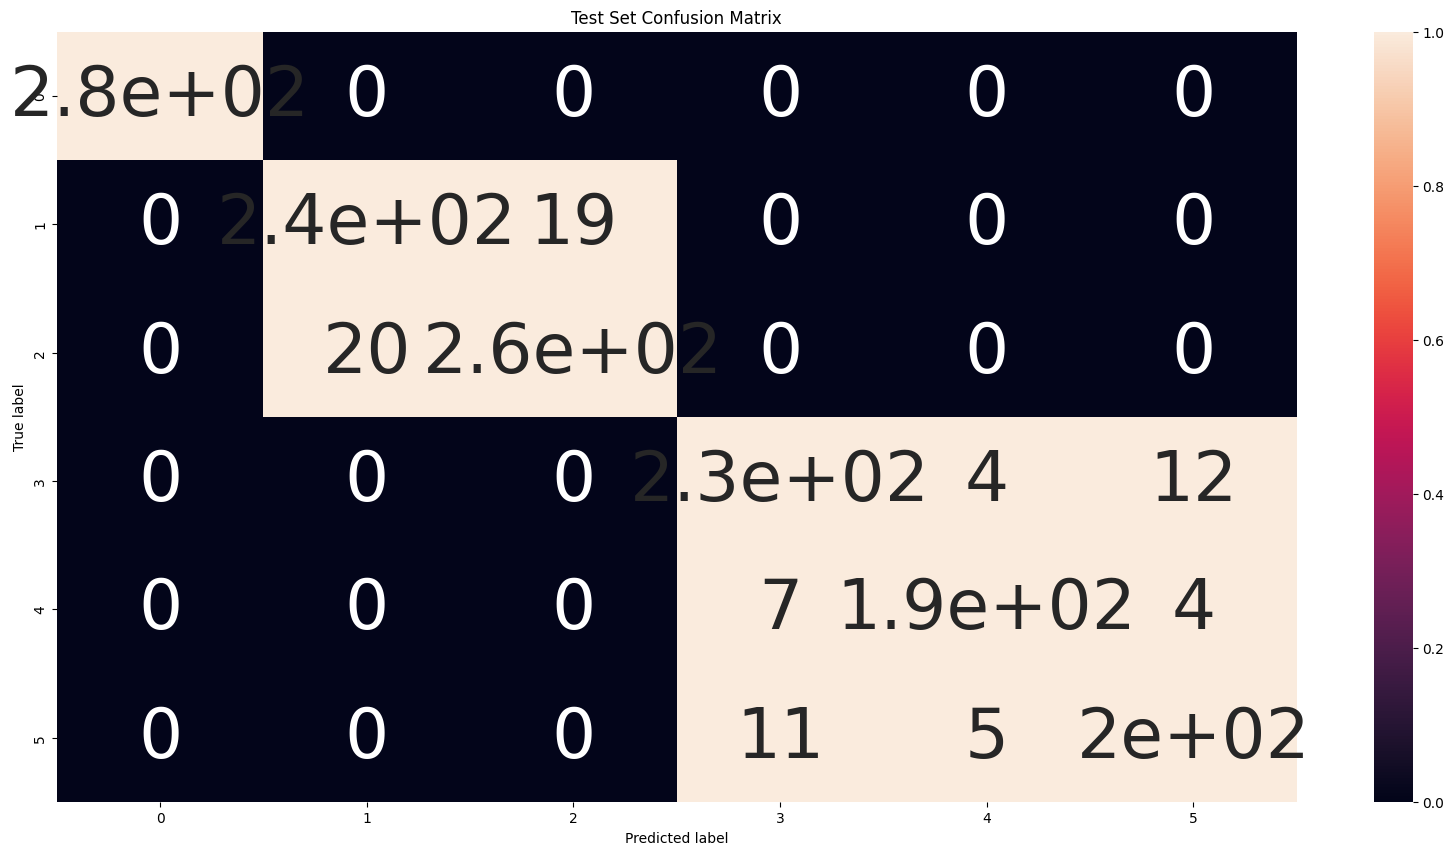

In [ ]:
# Plotting Confusion Matrix
from sklearn import tree # used to visualize the decision tree model
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (20,10))
plot_confusion_matrix(cm, classes=dt.classes_, title='Test Set Confusion Matrix')

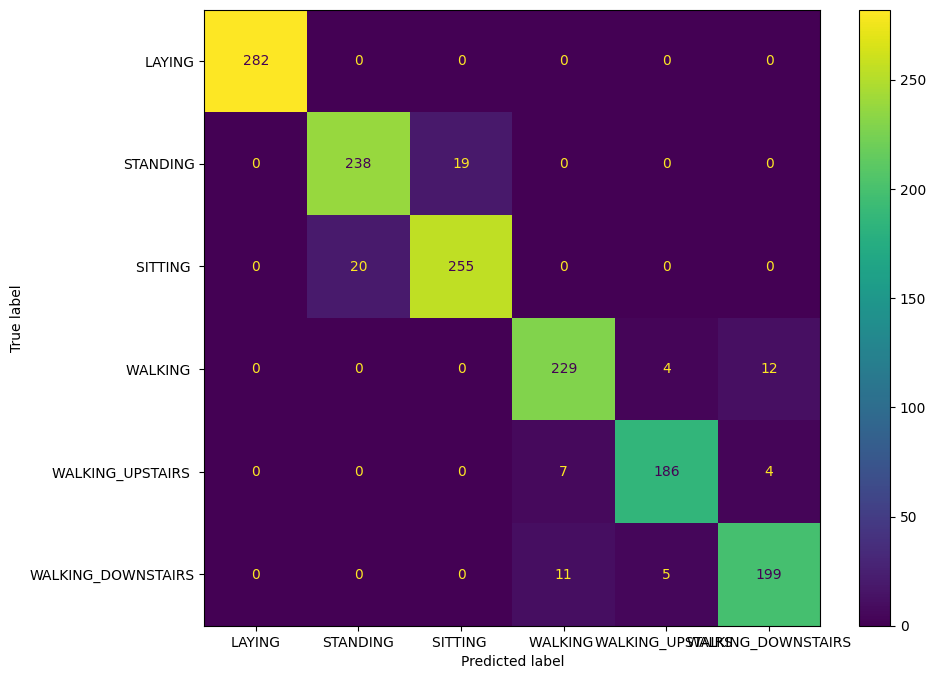

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[True, False])


from sklearn import metrics
import matplotlib.pyplot as plt

class_labels = ["LAYING", "STANDING", "SITTING ", "WALKING ", "WALKING_UPSTAIRS ", "WALKING_DOWNSTAIRS"]
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = [False, True])

cm_display.plot()
plt.show()

warnings.filterwarnings('ignore')

### GridSearchCv

In [ ]:
from sklearn.model_selection import GridSearchCV

# generate a finer grid of hyperparameters
param_grid = {
    'criterion': ["gini","entropy"],
    'max_depth': [int(x) for x in np.linspace(10, 1000,50)],
}

print(param_grid)

{'criterion': ['gini', 'entropy'], 'max_depth': [10, 30, 50, 70, 90, 111, 131, 151, 171, 191, 212, 232, 252, 272, 292, 313, 333, 353, 373, 393, 414, 434, 454, 474, 494, 515, 535, 555, 575, 595, 616, 636, 656, 676, 696, 717, 737, 757, 777, 797, 818, 838, 858, 878, 898, 919, 939, 959, 979, 1000]}


In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(dt,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [ ]:
grid_search.best_estimator_

In [ ]:
best_grid=grid_search.best_estimator_

In [ ]:
best_grid

In [ ]:
y_pred=best_grid.predict(X_test)
y_p=best_grid.predict(X_train)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))
print("Train Accuracy: ", accuracy_score(y_train, y_p))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

In [ ]:
# Confusion Matrix function; w

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,5))
plot_confusion_matrix(cm, classes=dt.classes_, title='Test Set Confusion Matrix')

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[True, False])


from sklearn import metrics
import matplotlib.pyplot as plt

class_labels = ["LAYING", "STANDING", "SITTING ", "WALKING ", "WALKING_UPSTAIRS ", "WALKING_DOWNSTAIRS"]
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = [False, True])

cm_display.plot()
plt.show()

warnings.filterwarnings('ignore')

### RandomSearchCV

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(20, 1000,50)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

In [ ]:

# Randomized search on hyper parameters
dt_randomcv=RandomizedSearchCV(estimator=dt,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
# Controls the verbosity: the higher, the more messages
# Number of jobs to run in parallel
### fit the randomized model
dt_randomcv.fit(X_train,y_train)

In [ ]:
dt_randomcv.best_params_
# Parameter setting that gave the best results

In [ ]:
dt_randomcv

In [ ]:
dt_randomcv.best_estimator_

In [ ]:
best_random_grid=dt_randomcv.best_estimator_
# storing the best hyperparameters

In [ ]:
y_pred=best_grid.predict(X_test)
y_p=best_grid.predict(X_train)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))
print("Train Accuracy: ", accuracy_score(y_train, y_p))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))


In [ ]:
pip install lime

###Lime


In [ ]:
import lime
import lime.lime_tabular

# Create the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=np.array(X_train), mode="classification",feature_names= X_train.columns, categorical_features=[0])

# Choose a specific instance from the test set for explanation
explanation_instance = X_test.iloc[0]

# Get the explanation for the instance
explanation = explainer.explain_instance(explanation_instance, best_grid.predict_proba)

# Print the explanation for the predicted class
explanation.show_in_notebook()


In [ ]:
explanation.as_list()

## **Random Forest:**

In [ ]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


In [ ]:
print("Confusion Matrix:")
print(confusion_mat)

print("\nClassification Report:")
print(classification_rep)


# Calculate and print the training accuracy
train_accuracy = accuracy_score(y_train, rf_classifier.predict(X_train))
print("Train Accuracy: {:.2f}%".format(train_accuracy * 100))

# Calculate and print the test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Define class labels
class_names = ["Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6"]

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Generate and display classification report
class_report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:\n", class_report)


In [ ]:
# Save confusion matrix as an image
plt.figure(figsize=(8, 6))
plt.class_labels = ["LAYING", "STANDING", "SITTING ", "WALKING ", "WALKING_UPSTAIRS ", "WALKING_DOWNSTAIRS"]


cm_display.plot()
plt.show()


In [ ]:


# Define the hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_dist,
    n_iter=10,  # Adjust the number of iterations as needed
    cv=3,       # Number of cross-validation folds
    n_jobs=-1,  # Utilize all available CPU cores
    verbose=2
)



# Perform hyperparameter tuning
random_search.fit(X_train, y_train)

In [ ]:
# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Use the best model for prediction
best_rf_classifier = random_search.best_estimator_
y_pred_best = best_rf_classifier.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best Model Accuracy: {:.3f}%".format(accuracy_best*100))

In [ ]:
# Set a specific value for the number of estimators (trees) in the Random Forest
n_estimators = 100  # You can adjust this value

# Create a Random Forest classifier with the specified number of estimators
rf_classifier_tuned = RandomForestClassifier(
    n_estimators=n_estimators,
    random_state=42
)

# Fit the classifier on the training data
rf_classifier_tuned.fit(X_train, y_train)

# Predict on the test data
y_pred_tuned = rf_classifier_tuned.predict(X_test)

# Calculate and print the test accuracy for the tuned model
test_accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("Tuned Model Best Accuracy: {:.3f}%".format(test_accuracy_tuned*100))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier with default values
rf_classifier = RandomForestClassifier(random_state=42)

# Define an empty hyperparameter grid (no values will be changed)
param_dist = {}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_dist,
    n_iter=1,  # You can set this to 1 since no hyperparameters will be changed
    cv=3,       # Number of cross-validation folds
    n_jobs=-1,  # Utilize all available CPU cores
    random_state=42,  # Set a random seed for reproducibility
    verbose=2
)

# Perform hyperparameter tuning (no values will be changed)
random_search.fit(X_train, y_train)

# Use the best model for prediction
best_rf_classifier = random_search.best_estimator_
y_pred_best = best_rf_classifier.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best Model Accuracy (with default hyperparameters):{:.3f}%".format(accuracy_best*100))


In [ ]:
import lime
import lime.lime_tabular

# Create the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=np.array(X_train), mode="classification",feature_names= X_train.columns, categorical_features=[0])

# Choose a specific instance from the test set for explanation
explanation_instance = X_test.iloc[0]

# Get the explanation for the instance
explanation = explainer.explain_instance(explanation_instance, best_grid.predict_proba)

# Print the explanation for the predicted class
explanation.show_in_notebook()

In [ ]:
explanation.as_list()

##KNN (K-Nearest Neighbors Algorithm)

In [ ]:
print('Training data size : ', X_train.shape)
print('Test data size : ', X_test.shape)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 7
knn = KNeighborsClassifier(n_neighbors=k)

In [ ]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


## Hyperparameter Tuning KNN

In [ ]:
from sklearn.model_selection import cross_val_score

k_range = range(1, 30)
cv_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, pd.concat([X_train,X_test], axis=0), pd.concat([y_train,y_test], axis=0), cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

plt.plot(k_range, cv_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
n_neighbors = list(range(1,30))

#Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
b = best_model.best_estimator_.get_params()['n_neighbors']
print('Best n_neighbors:', b)

In [ ]:
knn = KNeighborsClassifier(n_neighbors= b)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy (KNN): ", accuracy)

### Confusion Matrix function KNN

In [ ]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("\nClassification Report:\n",)
print (result1)

In [ ]:
# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Define class labels
class_names = ["Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6"]

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Create the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=np.array(X_train), mode="classification",feature_names= X_train.columns, categorical_features=[0])

# Choose a specific instance from the test set for explanation
explanation_instance = X_test.iloc[0]

# Get the explanation for the instance
explanation = explainer.explain_instance(explanation_instance, best_grid.predict_proba)

# Print the explanation for the predicted class
explanation.show_in_notebook()


In [ ]:
explanation.as_list()

## Initialize and train the logistic regression model


In [ ]:
# Initialize and train the logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


# Predict on the test data
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
print("Confusion Matrix:")
print(confusion_mat)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Define class labels
class_names = ["Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6"]

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Generate and display classification report
class_report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:\n", class_report)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')

In [ ]:
svm_model.fit(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

## **XG BOOST**

In [ ]:


# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Fit the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_xgb = xgb_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Model Accuracy: {:.2f}%".format(accuracy_xgb * 100))

# Generate and print the classification report
class_report_xgb = classification_report(y_test, y_pred_xgb)
print("Classification Report:\n", class_report_xgb)

# Generate and print the confusion matrix
confusion_mat_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:")
print(confusion_mat_xgb)




In [ ]:
# Define the hyperparameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
}

# Initialize RandomizedSearchCV for hyperparameter tuning
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Perform hyperparameter tuning
random_search_xgb.fit(X_train, y_train)

# Get the best hyperparameters
best_params_xgb = random_search_xgb.best_params_
print("Best Parameters:", best_params_xgb)

# Use the best model for prediction
best_xgb_classifier = random_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb_classifier.predict(X_test)

# Evaluate the best model
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
print("Best Model Accuracy (XGBoost): {:.2f}%".format(accuracy_best_xgb * 100))

In [ ]:
# Initialize the XGBoost classifier with default hyperparameters
xgb_classifier = XGBClassifier(random_state=42)

# Fit the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_xgb = xgb_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Model Accuracy (Default Hyperparameters): {:.2f}%".format(accuracy_xgb * 100))


In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

#AdaBoost

In [ ]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Classification Report:\n", classification_report(y_test, y_pred))

print("\nTrain Accuracy: ", metrics.accuracy_score(y_train, abc.predict(X_train)))
print("Test Accuracy: ", metrics.accuracy_score(y_test, y_pred))

In [ ]:
# Import Support Vector Classifier
from sklearn.svm import SVC

svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nTrain Accuracy: ", metrics.accuracy_score(y_train, abc.predict(X_train)))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
#Confusion Matrix

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", result)
print("\n\n")
# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Define class labels
class_names = ["Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6"]

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# pip install optuna

In [ ]:
import optuna
from optuna.samplers import TPESampler

def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    learning_rate = trial.suggest_float("learning_rate", 0.001, 1.0, log=True)
    abc = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=1)
    abc.fit(X_train, y_train)
    y_pred = abc.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [ ]:
sampler = TPESampler(seed=1)
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=30)

print("\n \n Number of finished trials: ", len(study.trials))
print("\nBest trial:")
trial = study.best_trial
print("  Accuracy: ", trial.value)
print("\n  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


In [ ]:
abc = AdaBoostClassifier(n_estimators=trial.params["n_estimators"], learning_rate=trial.params["learning_rate"], random_state=1)
abc.fit(X_train, y_train)

y_pred = abc.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
#grid for Adaboost
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']


grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
#Confusion Matrix

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", result)
print("\n\n")
# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Define class labels
class_names = ["Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6"]

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Create the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=np.array(X_train), mode="classification",feature_names= X_train.columns, categorical_features=[0])

# Choose a specific instance from the test set for explanation
explanation_instance = X_test.iloc[0]

# Get the explanation for the instance
explanation = explainer.explain_instance(explanation_instance, best_grid.predict_proba)

# Print the explanation for the predicted class
explanation.show_in_notebook()


In [ ]:
explanation.as_list()